# Perceptron Delta rule
Filippo Fantinato 2041620

In [10]:
import numpy as np
import random
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
np.random.seed([42])

In [12]:
def sigmoid(x):
  return 1 / ( 1 + np.exp(-x) )

In [13]:
class Perceptron:
  def __init__(self):
    self.W = None

  def weights(self):
    return self.W

  def train(self, X, y, learning_rate, epochs):
    size = X[0].shape[0]
    self.W = 2 * np.random.random((size,1)) - 1

    for _ in range(epochs):
      for i in range(len(X)):
        xi = np.reshape(X[i], (size,1))
        t = y[i]
        o = sigmoid(np.dot(self.W.T, xi))
        grad = (o - t) * o * (1 - o)
        self.W += -learning_rate * grad * xi

  def predict(self, X):
    return sigmoid(np.dot(X, self.W))

Let's define a function to compute the mean squared error.

In [14]:
def MSE(y1, y2):
  return np.sum((y1 - y2)**2) / len(y1)

and the horner's method useful to plot the hyperplane obtained by the perceptron weights.

In [15]:
def horner(poly, x):
    result = poly[0]
    for i in range(1, len(poly)):
        result = result*x + poly[i]
    return result

## AND

In [16]:
X_and = np.array([[1,1,1],
              [1,0,1],
              [0,1,1],
              [0,0,1]])
    
y_and = np.array([[1,0,0,0]]).T

p_and = Perceptron()

n_epochs = [1, 5, 10, 20, 50, 1000]
for epochs in n_epochs:
  p_and.train(X_and, y_and, learning_rate = 0.25, epochs = epochs)
  y_and_pred = p_and.predict(X_and)
  print("Epochs:", epochs, "- Error:", MSE(y_and, y_and_pred))
  print("Predict: ", y_and_pred.T)
  print("=================")

Epochs: 1 - Error: 0.2394086599826456
Predict:  [[0.24692388 0.45220659 0.19792726 0.38320359]]
Epochs: 5 - Error: 0.2594763759764346
Predict:  [[0.47797924 0.37213079 0.61075355 0.50388352]]
Epochs: 10 - Error: 0.2134265861873852
Predict:  [[0.40687047 0.55607183 0.24093508 0.36693065]]
Epochs: 20 - Error: 0.235623574853074
Predict:  [[0.1862823  0.24160156 0.29467068 0.36763524]]
Epochs: 50 - Error: 0.1857459859245798
Predict:  [[0.30970657 0.284987   0.3166143  0.29157627]]
Epochs: 1000 - Error: 0.01238422696834834
Predict:  [[0.85540322 0.11941402 0.11983026 0.00311113]]


## XOR

In [17]:
X_xor = np.array([[1,1,0],
              [1,0,0],
              [0,1,0],
              [0,0,0]])
    
y_xor = np.array([[0,1,1,0]]).T

p_xor = Perceptron()

n_epochs = [1, 5, 10, 20, 50, 1000]
for epochs in n_epochs:
  p_xor.train(X_xor, y_xor, learning_rate = 0.5, epochs = epochs)
  y_xor_pred = p_xor.predict(X_xor)
  print("Epochs:", epochs, "- Error:", MSE(y_xor, y_xor_pred))
  print("Predict: ", y_xor_pred.T)
  print("=================")

Epochs: 1 - Error: 0.26705888210368656
Predict:  [[0.41242067 0.6481984  0.27585889 0.5       ]]
Epochs: 5 - Error: 0.2530579656451817
Predict:  [[0.51218978 0.5825302  0.42937538 0.5       ]]
Epochs: 10 - Error: 0.2581378871218516
Predict:  [[0.56145191 0.63952348 0.41915581 0.5       ]]
Epochs: 20 - Error: 0.25628573065900917
Predict:  [[0.47838926 0.37669125 0.60279371 0.5       ]]
Epochs: 50 - Error: 0.25009178619154804
Predict:  [[0.51516278 0.51111607 0.50404944 0.5       ]]
Epochs: 1000 - Error: 0.2500420904703282
Predict:  [[0.51063175 0.50531648 0.50531648 0.5       ]]


##Linearly separable data

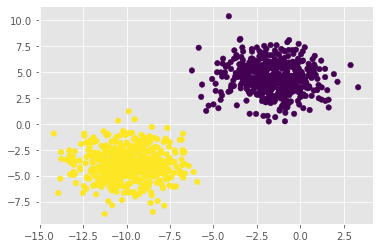

In [18]:
(X_sep, y_sep) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y_sep = y_sep.reshape((y_sep.shape[0], 1))

plt.style.use("ggplot")
plt.figure("Linearly separable data")
plt.scatter(X_sep[:, 0], X_sep[:, 1], marker="o", c=y_sep[:, 0], s=30)

In [19]:
p_sep = Perceptron()
p_sep.train(X_sep, y_sep, 0.1, 1000)
y_sep_pred = p_sep.predict(X_sep)
print(MSE(y_sep, y_sep_pred))

0.0004899642297260176


Text(0.5, 1.0, 'Linearly separable data classification')

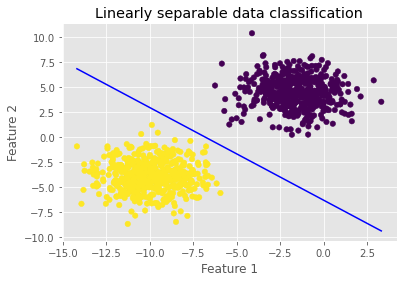

In [20]:
plt.scatter(X_sep[:, 0], X_sep[:, 1], marker="o", c=y_sep[:, 0], s=30)

x_line_sep = np.linspace(np.amin(X_sep[:,0]), np.amax(X_sep[:,0]))
y_line_sep = horner(p_sep.weights(), x_line_sep)

plt.plot(x_line_sep, y_line_sep,'b')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Linearly separable data classification')

## Non linearly separable data 

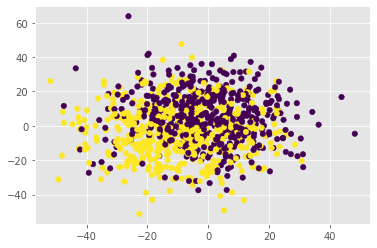

In [22]:
(X_non_sep, y_non_sep) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=15, random_state=1)
y_non_sep = y_non_sep.reshape((y_non_sep.shape[0], 1))

plt.style.use("ggplot")
plt.figure("Non linearly separable data")
plt.scatter(X_non_sep[:, 0], X_non_sep[:, 1], marker="o", c=y_non_sep[:, 0], s=30)

In [24]:
p_non_sep = Perceptron()
p_non_sep.train(X_non_sep, y_non_sep, 0.1, 1000)
print(MSE(y_non_sep, p_non_sep.predict(X_non_sep)))

0.33992332111299434


Text(0.5, 1.0, 'Non linearly separable data classification')

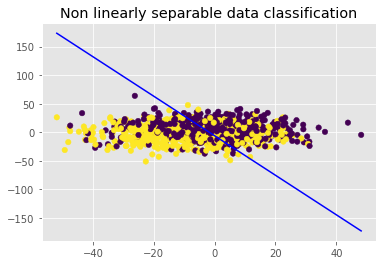

In [26]:
plt.scatter(X_non_sep[:, 0], X_non_sep[:, 1], marker="o", c=y_non_sep[:, 0], s=30)

x_line_non_sep = np.linspace(np.amin(X_non_sep[:,0]), np.amax(X_non_sep[:,0]))
y_line_non_sep = horner(p_non_sep.weights(), x_line_non_sep)

plt.plot(x_line_non_sep, y_line_non_sep,'b')

plt.title('Non linearly separable data classification')